In [1]:
import json
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "Amazon_Fashion.jsonl"
data = []

with open(file, 'r') as f:
    for line in f:
        if random.random() < 0.3:
            data.append(json.loads(line))
            
reviews = pd.DataFrame(data)

In [3]:
reviews.shape

(751135, 10)

In [4]:
reviews = reviews[reviews['verified_purchase'] == True] #keep only verified purchases

In [5]:
reviews.shape

(702057, 10)

In [6]:
reviews = reviews[['rating','parent_asin','text']] #keep only the columns we are interested in

In [7]:
reviews

,rating,parent_asin,text
0,5.0,B01MZDN9Z4,Great fit
1,4.0,B00N9X4XNU,Would be five stars but they are just too heav...
2,5.0,B087M39LVV,What a cute top! Cam wait to wear in warm weat...
3,2.0,B0799L7FMC,"Very inexpensive, but too rough and uncomforta..."
4,2.0,B077GN3YZJ,Runs way smaller than indicated.
...,...,...,...
751130,5.0,B07HF4F6LP,I bought this for my mom for Mother’s Day she ...
751131,5.0,B07HF4F6LP,Great piece
751132,1.0,B00YGFMQC0,I got an empty bag in my package of 10 that I ...
751133,5.0,B00YGFMQC0,My groomsmen loved these! What a great idea!


In [8]:
file = "meta_Amazon_Fashion.jsonl"
data = []

with open(file, 'r') as f:
    for line in f:
        data.append(json.loads(line))
            
description = pd.DataFrame(data)

In [9]:
description.shape

(826108, 14)

In [10]:
description = description[['title','parent_asin','average_rating']] #keep only the columns we are interested in

In [11]:
description

,title,parent_asin,average_rating
0,YUEDGE 5 Pairs Men's Moisture Control Cushione...,B08BHN9PK5,4.6
1,DouBCQ Women's Palazzo Lounge Wide Leg Casual ...,B08R39MRDW,4.1
2,Pastel by Vivienne Honey Vanilla Girls' Trapez...,B077KJHCJ4,4.3
3,Mento Streamtail,B0811M2JG9,2.0
4,RONNOX Women's 3-Pairs Bright Colored Calf Com...,B07SB2892S,4.3
...,...,...,...
826103,Salimdy Women's Fashion New Ruched Waist Class...,B078HY8B34,2.0
826104,Cat Mom Tshirt Trendy Short Sleeve Crewneck Gr...,B09V5DB85S,5.0
826105,Nike San Francisco 49ers Hot Quarter Zip S/S P...,B00NTQ14CK,5.0
826106,Joe's USA Mens 3X-Large Tall Long Sleeve Easy ...,B00Y8O4N8E,5.0


In [12]:
merged_df = reviews.merge(description, on="parent_asin", how="inner")

In [13]:
merged_df

,rating,parent_asin,text,title,average_rating
0,5.0,B01MZDN9Z4,Great fit,PUMA Men's IT Evotrg Graphic Tee True Blue/Bri...,5.0
1,4.0,B00N9X4XNU,Would be five stars but they are just too heav...,joyliveCY Women Charm Jewerly Rose Gold Plated...,4.1
2,5.0,B087M39LVV,What a cute top! Cam wait to wear in warm weat...,Twotwowin womens Casual,3.7
3,2.0,B0799L7FMC,"Very inexpensive, but too rough and uncomforta...",ULTPEAK Dog Bark Control Anti Bark 50 FT Range...,4.0
4,2.0,B077GN3YZJ,Runs way smaller than indicated.,SSLR Women's Christmas Tropical Button Down Sh...,2.0
...,...,...,...,...,...
702052,5.0,B07HF4F6LP,I bought this for my mom for Mother’s Day she ...,Charmed Craft Mother Mom Love Child Charms Ele...,4.5
702053,5.0,B07HF4F6LP,Great piece,Charmed Craft Mother Mom Love Child Charms Ele...,4.5
702054,1.0,B00YGFMQC0,I got an empty bag in my package of 10 that I ...,Set of 10 Tie Clips - Elegant Designs (tc10b) ...,4.5
702055,5.0,B00YGFMQC0,My groomsmen loved these! What a great idea!,Set of 10 Tie Clips - Elegant Designs (tc10b) ...,4.5


In [14]:
merged_df['category'] = 'TBD'

import re

patterns = {
    'Shirts/Tops': r'\b(shirt\w*|t[- ]?shirt\w*|blouse\w*|tank\w*|polo\w*|tee\w*)\b',
    'Pants/Bottoms': r'\b(pant\w*|trouser\w*|jean\w*|legging\w*|short\w*|sweatpant\w*)\b',
    'Skirts': r'\b(skirt\w*)\b',
    'Dresses': r'\b(dress\w*|gown\w*)\b',
    'Outerwear': r'\b(jacket\w*|coat\w*|blazer\w*|parka\w*|hoodie\w*|cardigan\w*)\b',
    'Shoes': r'\b(sneaker\w*|boot\w*|sandal\w*|loafer\w*|heel\w*|flat\w*)\b',
    'Socks/Underwear': r'\b(sock\w*|underwear\w*|brief\w*|boxer\w*|bra\w*)\b',
    'Jewelry': r'\b(ring\w*|necklace\w*|earring\w*|bracelet\w*|pendant\w*|chain\w*|anklet\w*)\b',
    'Accessories': r'\b(hat\w*|cap\w*|belt\w*|scarf\w*|glove\w*|sunglass\w*|watch\w*|tie\w*)\b',
    'Bags': r'\b(\w*bag\w*|backpack\w*|purse\w*|tote\w*)\b'
}

# Function to categorize
def categorize_product(title):
    for category, pattern in patterns.items():
        if re.search(pattern, title, re.IGNORECASE):
            return category
    return 'Other'

# Apply to DataFrame
merged_df['category'] = merged_df['title'].apply(categorize_product)

merged_df['category'].value_counts()

category
Other              134864
Accessories        103100
Shirts/Tops         90039
Jewelry             89856
Pants/Bottoms       66683
Socks/Underwear     66552
Dresses             65695
Outerwear           26475
Shoes               26120
Bags                24499
Skirts               8174
Name: count, dtype: int64

In [15]:
merged_df

,rating,parent_asin,text,title,average_rating,category
0,5.0,B01MZDN9Z4,Great fit,PUMA Men's IT Evotrg Graphic Tee True Blue/Bri...,5.0,Shirts/Tops
1,4.0,B00N9X4XNU,Would be five stars but they are just too heav...,joyliveCY Women Charm Jewerly Rose Gold Plated...,4.1,Jewelry
2,5.0,B087M39LVV,What a cute top! Cam wait to wear in warm weat...,Twotwowin womens Casual,3.7,Other
3,2.0,B0799L7FMC,"Very inexpensive, but too rough and uncomforta...",ULTPEAK Dog Bark Control Anti Bark 50 FT Range...,4.0,Other
4,2.0,B077GN3YZJ,Runs way smaller than indicated.,SSLR Women's Christmas Tropical Button Down Sh...,2.0,Shirts/Tops
...,...,...,...,...,...,...
702052,5.0,B07HF4F6LP,I bought this for my mom for Mother’s Day she ...,Charmed Craft Mother Mom Love Child Charms Ele...,4.5,Socks/Underwear
702053,5.0,B07HF4F6LP,Great piece,Charmed Craft Mother Mom Love Child Charms Ele...,4.5,Socks/Underwear
702054,1.0,B00YGFMQC0,I got an empty bag in my package of 10 that I ...,Set of 10 Tie Clips - Elegant Designs (tc10b) ...,4.5,Accessories
702055,5.0,B00YGFMQC0,My groomsmen loved these! What a great idea!,Set of 10 Tie Clips - Elegant Designs (tc10b) ...,4.5,Accessories


### Exploring the Dataset

In [16]:
# Check for missing values in merged_df
missing_values = merged_df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print("\nTotal missing values:", missing_values.sum())
print("\nPercentage of missing values per column:")
print((missing_values / len(merged_df) * 100).round(2))


Missing values per column:
rating            0
parent_asin       0
text              0
title             0
average_rating    0
category          0
dtype: int64

Total missing values: 0

Percentage of missing values per column:
rating            0.0
parent_asin       0.0
text              0.0
title             0.0
average_rating    0.0
category          0.0
dtype: float64


In [17]:
# Show unique items based on count of title in table form
title_counts = merged_df['title'].value_counts().reset_index()
title_counts.columns = ['Title', 'Count']
title_counts = title_counts.sort_values('Count', ascending=False).reset_index(drop=True)
print(f"Total number of unique titles: {merged_df['title'].nunique()}")
print(f"Total number of rows: {len(merged_df)}\n")
title_counts


Total number of unique titles: 335885
Total number of rows: 702057



,Title,Count
0,Casio F91W-1 Classic Resin Strap Digital Sport...,2109
1,Russell Athletic Men's Dri-Power Fleece Hoodie...,1885
2,NELEUS Women's 3 Pack Compression Base Layer D...,1233
3,90 Degree By Reflex High Waist Squat Proof Tum...,1019
4,NELEUS Men's 3 Pack Dry Fit Y-Back Muscle Tank...,885
...,...,...
335880,CHICIRIS Women's 3/4 Sleeve Comfy Crochet Slee...,1
335881,Boys Alien Character One Piece Hooded Footless...,1
335882,Pair of Oversized Black Tribal Mandala Top Ear...,1
335883,Verdusa Women's Boat Neck Batwing Sleeve Baggy...,1


##### The casio watch has the most reviews, followed by the fleece hoodie.

In [18]:
# Table displaying titles with the highest average_ratings
title_avg_ratings = merged_df.groupby('title')['average_rating'].mean().reset_index()
title_avg_ratings.columns = ['Title', 'Average Rating']
title_avg_ratings = title_avg_ratings.sort_values('Average Rating', ascending=False).reset_index(drop=True)
title_avg_ratings


,Title,Average Rating
0,"FITKICKS '76 Varsity Athletic Hoodie, Workout ...",5.0
1,Ripple Junction Rick and Morty Hipster Morty F...,5.0
2,CafePress - Gods NOT Dead: T-Shirt - 100% Cott...,5.0
3,CafePress - I Love Being A Grandma License Fra...,5.0
4,CafePress - I Love Teaching License Plate Fram...,5.0
...,...,...
335880,Salabomia Womens Beach Shorts Corgi Floral Pri...,1.0
335881,FQZWONG Women's Pleated Skirt Solid Elegant El...,1.0
335882,Milumia Women's Tropical Print Criss Cross Bac...,1.0
335883,FQHOME Womens Green Bandeau High Waist Bikini ...,1.0


C:\Users\yzhen\AppData\Local\Temp\ipykernel_22124\3218966857.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


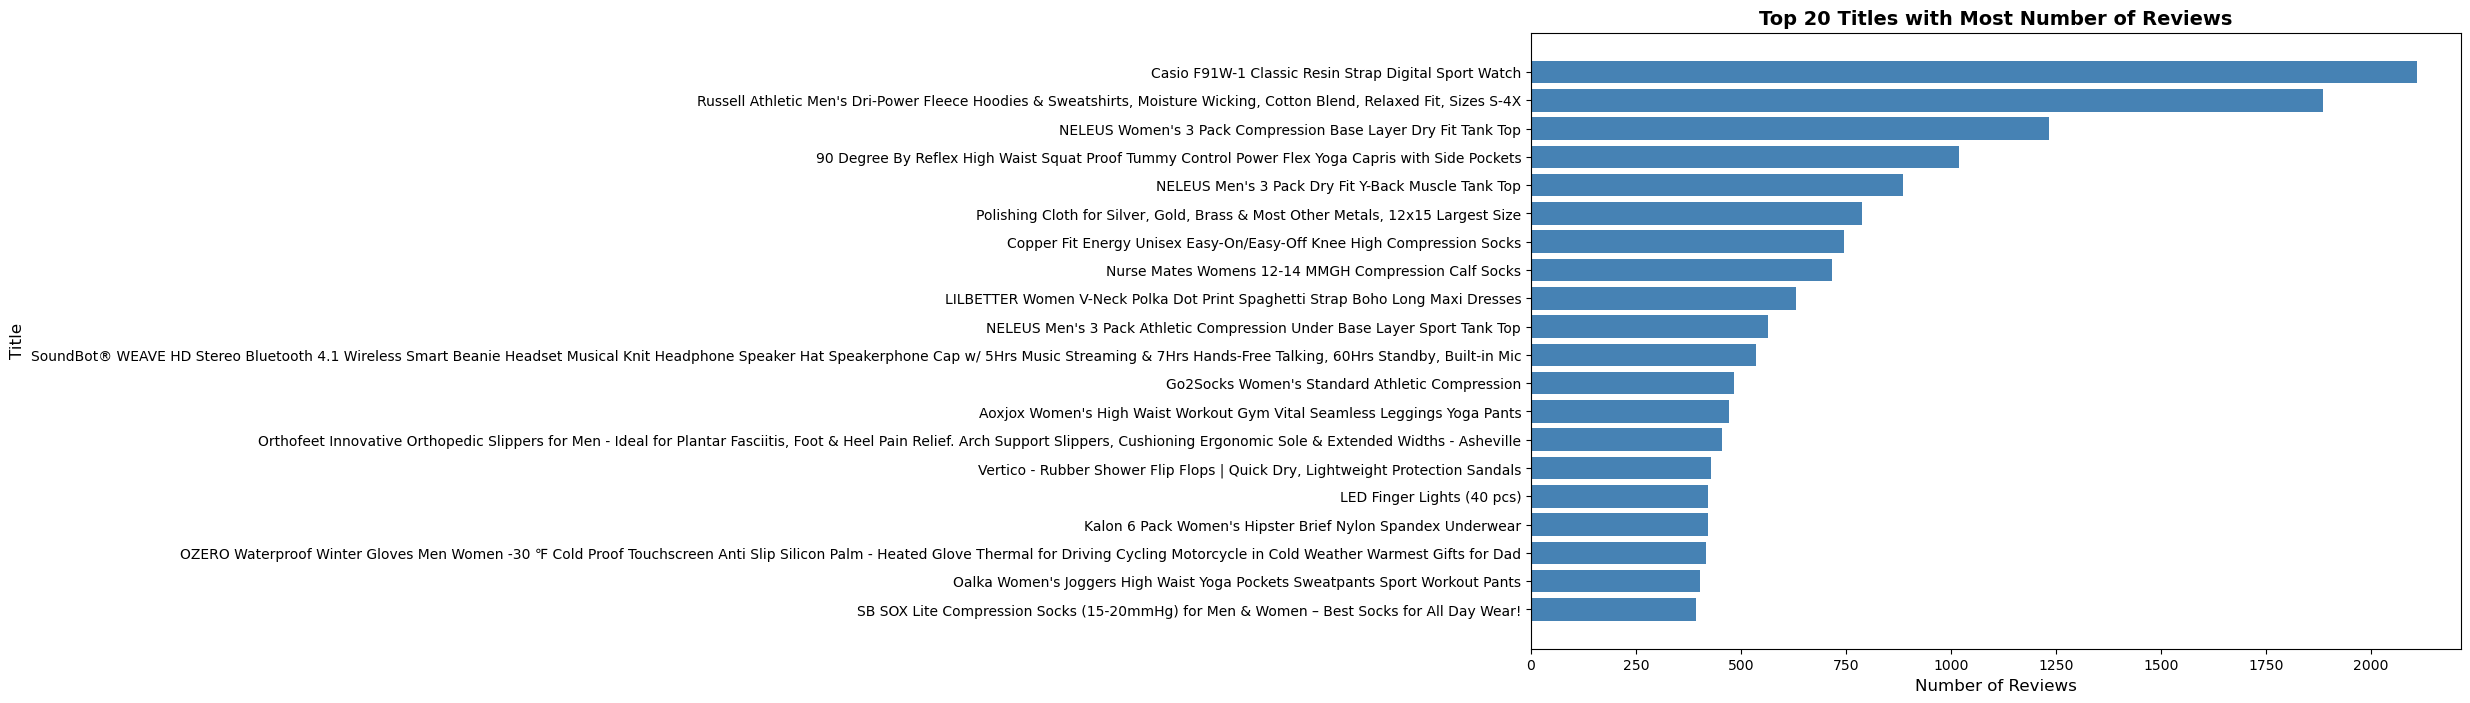

Total number of unique titles: 335885

Top 10 titles by review count:
                                               Title  Number of Reviews
0  Casio F91W-1 Classic Resin Strap Digital Sport...               2109
1  Russell Athletic Men's Dri-Power Fleece Hoodie...               1885
2  NELEUS Women's 3 Pack Compression Base Layer D...               1233
3  90 Degree By Reflex High Waist Squat Proof Tum...               1019
4  NELEUS Men's 3 Pack Dry Fit Y-Back Muscle Tank...                885
5  Polishing Cloth for Silver, Gold, Brass & Most...                788
6  Copper Fit Energy Unisex Easy-On/Easy-Off Knee...                746
7  Nurse Mates Womens 12-14 MMGH Compression Calf...                718
8  LILBETTER Women V-Neck Polka Dot Print Spaghet...                632
9  NELEUS Men's 3 Pack Athletic Compression Under...                565


In [19]:
# Bar chart showing titles with the most number of reviews (text)
title_review_counts = merged_df.groupby('title')['text'].count().reset_index()
title_review_counts.columns = ['Title', 'Number of Reviews']
title_review_counts = title_review_counts.sort_values('Number of Reviews', ascending=False).reset_index(drop=True)

# Get top 20 titles for better visualization
top_titles = title_review_counts.head(20)

# Create bar chart
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_titles)), top_titles['Number of Reviews'], color='steelblue')
plt.yticks(range(len(top_titles)), top_titles['Title'])
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.title('Top 20 Titles with Most Number of Reviews', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Show highest at top
plt.tight_layout()
plt.show()

print(f"Total number of unique titles: {len(title_review_counts)}")
print(f"\nTop 10 titles by review count:")
print(top_titles.head(10))


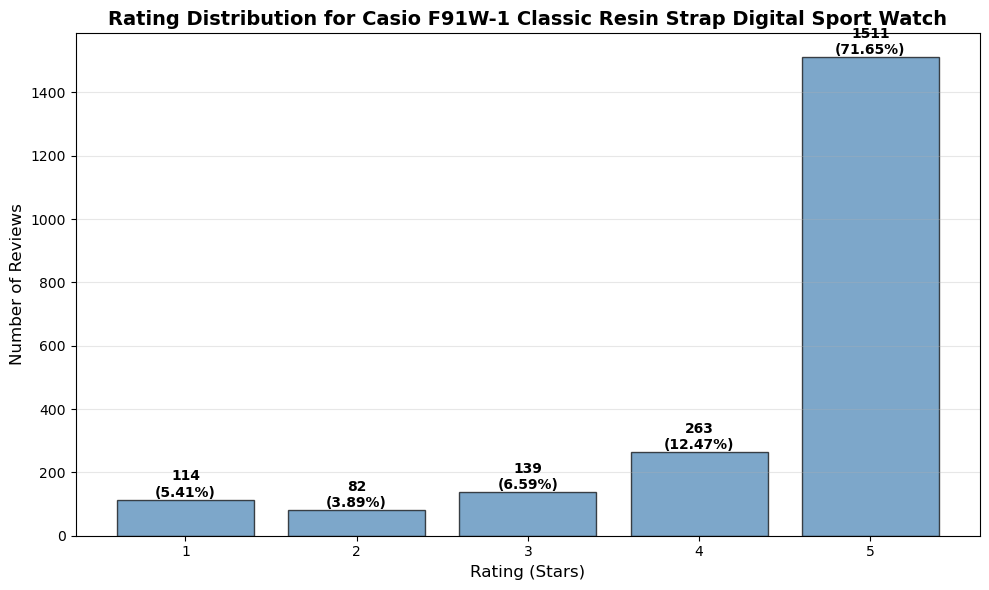

Total reviews: 2109

Rating distribution:
rating
1.0     114
2.0      82
3.0     139
4.0     263
5.0    1511
Name: count, dtype: int64

Rating percentages:
  1.0 stars: 5.41%
  2.0 stars: 3.89%
  3.0 stars: 6.59%
  4.0 stars: 12.47%
  5.0 stars: 71.65%

Average rating: 4.41
Median rating: 5.00


In [20]:
# Distribution of ratings for Casio F91W-1 Classic Resin Strap Digital Sport Watch
casio_title = "Casio F91W-1 Classic Resin Strap Digital Sport Watch"
casio_df = merged_df[merged_df['title'] == casio_title]

# Count ratings
rating_dist = casio_df['rating'].value_counts().sort_index()
rating_percentages = (casio_df['rating'].value_counts(normalize=True).sort_index() * 100).round(2)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_dist.index, rating_dist.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title(f'Rating Distribution for {casio_title}', fontsize=14, fontweight='bold')
plt.xticks(rating_dist.index)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (rating, count) in enumerate(rating_dist.items()):
    plt.text(rating, count, f'{count}\n({rating_percentages[rating]}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total reviews: {len(casio_df)}")
print(f"\nRating distribution:")
print(rating_dist)
print(f"\nRating percentages:")
for rating in sorted(rating_percentages.index):
    print(f"  {rating} stars: {rating_percentages[rating]}%")
print(f"\nAverage rating: {casio_df['rating'].mean():.2f}")
print(f"Median rating: {casio_df['rating'].median():.2f}")


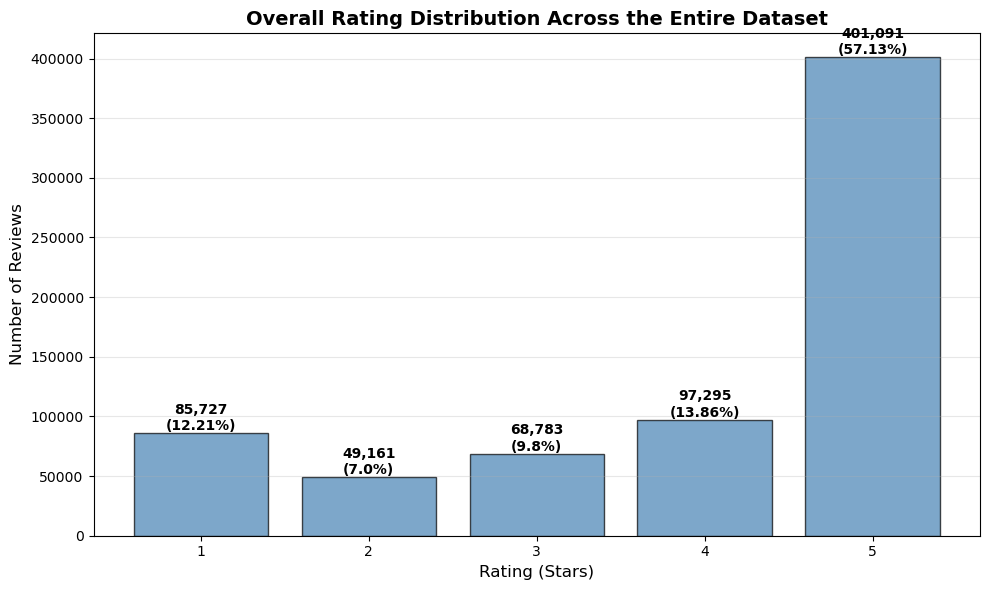

Total reviews in dataset: 702,057

Rating distribution:
rating
1.0     85727
2.0     49161
3.0     68783
4.0     97295
5.0    401091
Name: count, dtype: int64

Rating percentages:
  1.0 stars: 12.21% (85,727 reviews)
  2.0 stars: 7.0% (49,161 reviews)
  3.0 stars: 9.8% (68,783 reviews)
  4.0 stars: 13.86% (97,295 reviews)
  5.0 stars: 57.13% (401,091 reviews)

Average rating: 3.97
Median rating: 5.00
Standard deviation: 1.43


In [21]:
# Overall distribution of ratings across the whole dataset
rating_dist = merged_df['rating'].value_counts().sort_index()
rating_percentages = (merged_df['rating'].value_counts(normalize=True).sort_index() * 100).round(2)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_dist.index, rating_dist.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Overall Rating Distribution Across the Entire Dataset', fontsize=14, fontweight='bold')
plt.xticks(rating_dist.index)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for rating, count in rating_dist.items():
    plt.text(rating, count, f'{count:,}\n({rating_percentages[rating]}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total reviews in dataset: {len(merged_df):,}")
print(f"\nRating distribution:")
print(rating_dist)
print(f"\nRating percentages:")
for rating in sorted(rating_percentages.index):
    print(f"  {rating} stars: {rating_percentages[rating]}% ({rating_dist[rating]:,} reviews)")
print(f"\nAverage rating: {merged_df['rating'].mean():.2f}")
print(f"Median rating: {merged_df['rating'].median():.2f}")
print(f"Standard deviation: {merged_df['rating'].std():.2f}")


In [22]:
# Products with the lowest ratings (including review text)
# First, calculate average rating per product
title_avg_ratings = merged_df.groupby('title')['rating'].mean().reset_index()
title_avg_ratings.columns = ['title', 'avg_rating']
title_avg_ratings = title_avg_ratings.sort_values('avg_rating', ascending=True)

# Merge back with original data to get all reviews for lowest-rated products
# Get top N products with lowest ratings (e.g., top 100)
lowest_rated_titles = title_avg_ratings.head(100)['title'].tolist()
lowest_rated_df = merged_df[merged_df['title'].isin(lowest_rated_titles)].copy()

# Add average rating column for each product
lowest_rated_df = lowest_rated_df.merge(title_avg_ratings, on='title', how='left')

# Sort by average rating (ascending) and then by individual rating
lowest_rated_df = lowest_rated_df.sort_values(['avg_rating', 'rating'], ascending=[True, True]).reset_index(drop=True)

# Select and rename columns for display
result_df = lowest_rated_df[['title', 'rating', 'text', 'avg_rating']].copy()
result_df.columns = ['Title', 'Review Rating', 'Review Text', 'Product Average Rating']
result_df['Product Average Rating'] = result_df['Product Average Rating'].round(2)

print(f"Reviews for products with the lowest average ratings:")
print(f"Showing reviews for top 100 lowest-rated products")
print(f"Total reviews shown: {len(result_df)}\n")
result_df


Reviews for products with the lowest average ratings:
Showing reviews for top 100 lowest-rated products
Total reviews shown: 103



,Title,Review Rating,Review Text,Product Average Rating
0,Calvin Klein Infinite Automatic Silver Dial Me...,1.0,Watch face has blemishes on it. Mine also had...,1.0
1,"Called To Surf V-Neck Bridesmaid Dress, Chiffo...",1.0,The button on the chest is in the wrong place ...,1.0
2,Revant Replacement Lenses Compatible With Ray-...,1.0,"Ordered 56mm lenses for my 56 mm ray bans, len...",1.0
3,Rainlover Women's Summer Short Sleeve V Neck B...,1.0,I bought several sizes up based on the reviews...,1.0
4,Rexcyril Men's Windbreaker Hooded Jacket Light...,1.0,2nd time reordered both times the words Embrac...,1.0
...,...,...,...,...
98,Rfecccy Women's 50th Birthday Gifts-Made in 72...,1.0,The red is burgundy!,1.0
99,Reverse Tie Dye Halloween Shirts for Women San...,1.0,This is probably the ugliest shirt I have ever...,1.0
100,Calvin Klein Womens Chevron Quilted Down Vest ...,1.0,I question if this is actually calvin klien. I...,1.0
101,"Rhodium Plated ""I will always be with you"" Cou...",1.0,"No es como se ve en la foto, el mensaje ni se ve",1.0


C:\Users\yzhen\AppData\Local\Temp\ipykernel_22124\1075569783.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='rating', data=merged_df, ci=None)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Shirts/Tops'),
  Text(1, 0, 'Jewelry'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Socks/Underwear'),
  Text(4, 0, 'Accessories'),
  Text(5, 0, 'Bags'),
  Text(6, 0, 'Pants/Bottoms'),
  Text(7, 0, 'Dresses'),
  Text(8, 0, 'Outerwear'),
  Text(9, 0, 'Shoes'),
  Text(10, 0, 'Skirts')])

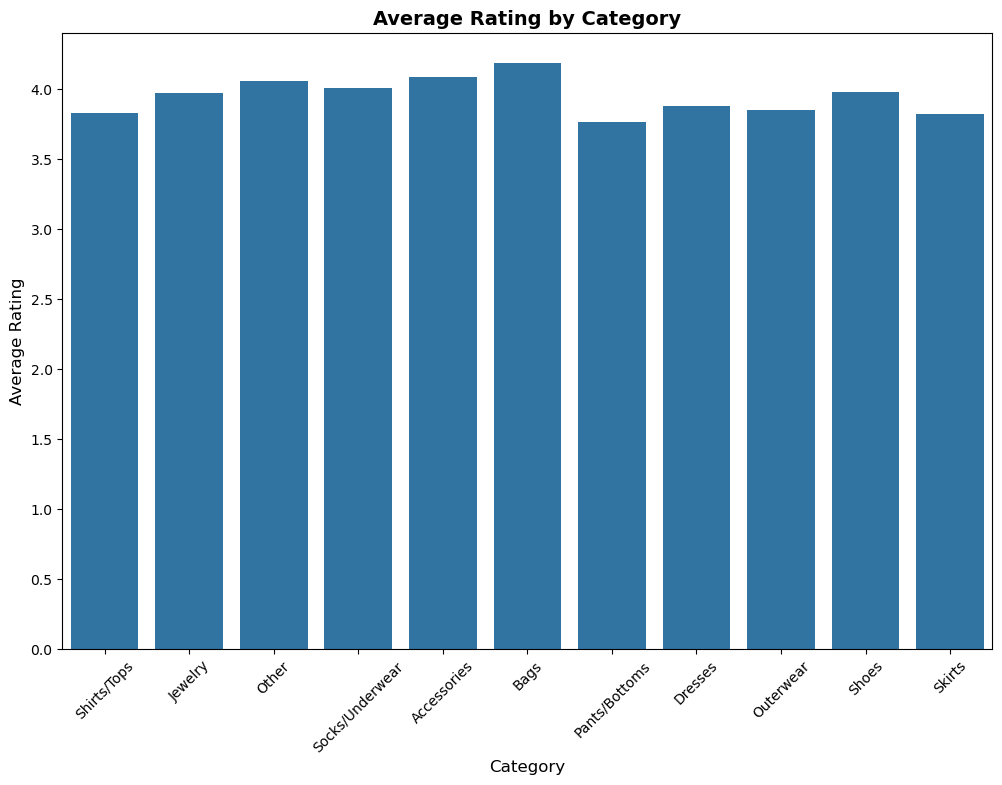

In [23]:
#Ditribution of ratings in the dataset based on the category. Show me a bar chart of the distribution of the ratings in the dataset based on the category.
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='rating', data=merged_df, ci=None)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Average Rating by Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

### Balancing the Dataset

Method 1: Random Undersampling to balance the dataset by only keeping a portion of items that have 5.0 rating. In this scenario, there are an equal number of 5.0 rating items and 1.0 rating items.

In [24]:
#Random undersampling
# Take a random sample of the majority class
majority_class = merged_df[merged_df['rating'] == 5]
majority_sample = majority_class.sample(n=len(merged_df[merged_df['rating'] == 1]), random_state=42)

#Replace the majority class (rating = 5) with the majority sample
#balanced_df = merged_df[merged_df['rating'] != 5].append(majority_sample)
balanced_df = pd.concat([merged_df[merged_df['rating'] != 5], majority_sample])

#Check the balance of the dataset
print(balanced_df['rating'].value_counts())


rating
4.0    97295
1.0    85727
5.0    85727
3.0    68783
2.0    49161
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x1d155851190>,
 [Text(4.0, 0, '4'),
  Text(1.0, 0, '1'),
  Text(5.0, 0, '5'),
  Text(3.0, 0, '3'),
  Text(2.0, 0, '2')])

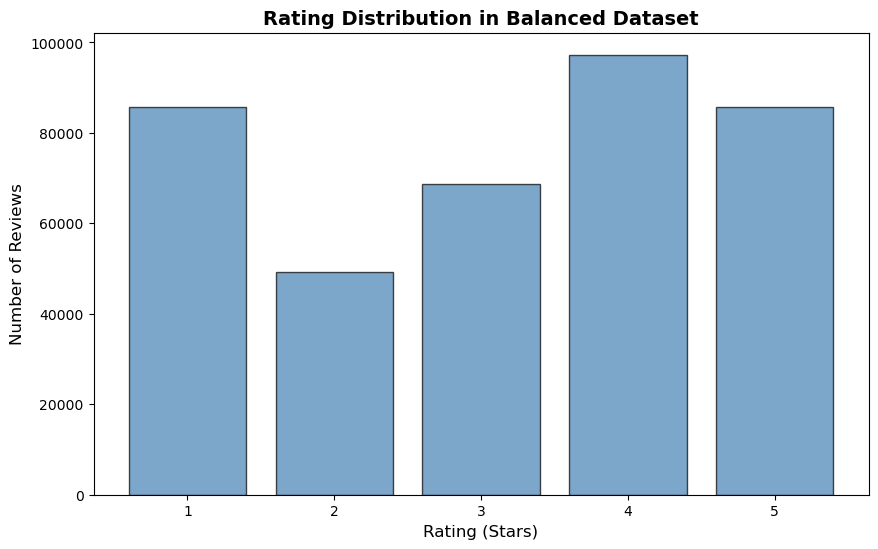

In [25]:
#show me a bar chart of the distribution of the ratings in the balanced dataset
plt.figure(figsize=(10, 6))
bars = plt.bar(balanced_df['rating'].value_counts().index, balanced_df['rating'].value_counts().values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Rating Distribution in Balanced Dataset', fontsize=14, fontweight='bold')
plt.xticks(balanced_df['rating'].value_counts().index)

Method 2: Random undersampling by taking an equal random sampling of all ratings (from 1.0 to 5.0). 

In [26]:
# Random undersampling by taking an equal random sampling of all ratings (from 1.0 to 5.0)
# Find the minimum count among all rating categories
rating_counts = merged_df['rating'].value_counts().sort_index()
min_count = rating_counts.min()

print(f"Original rating distribution:")
print(rating_counts)
print(f"\nMinimum count across all ratings: {min_count}")
print(f"This will be the sample size for each rating category.\n")

# Randomly sample equal number of samples from each rating category
balanced_samples = []
for rating in sorted(merged_df['rating'].unique()):
    rating_df = merged_df[merged_df['rating'] == rating]
    sample = rating_df.sample(n=min_count, random_state=42)
    balanced_samples.append(sample)
    print(f"Rating {rating}: Sampled {len(sample)} reviews (from {len(rating_df)} total)")

# Combine all samples into balanced dataset
balanced_df_equal = pd.concat(balanced_samples, ignore_index=True)

# Shuffle the balanced dataset
balanced_df_equal = balanced_df_equal.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nBalanced dataset shape: {balanced_df_equal.shape}")
print(f"\nFinal rating distribution:")
print(balanced_df_equal['rating'].value_counts().sort_index())

Original rating distribution:
rating
1.0     85727
2.0     49161
3.0     68783
4.0     97295
5.0    401091
Name: count, dtype: int64

Minimum count across all ratings: 49161
This will be the sample size for each rating category.

Rating 1.0: Sampled 49161 reviews (from 85727 total)
Rating 2.0: Sampled 49161 reviews (from 49161 total)
Rating 3.0: Sampled 49161 reviews (from 68783 total)
Rating 4.0: Sampled 49161 reviews (from 97295 total)
Rating 5.0: Sampled 49161 reviews (from 401091 total)

Balanced dataset shape: (245805, 6)

Final rating distribution:
rating
1.0    49161
2.0    49161
3.0    49161
4.0    49161
5.0    49161
Name: count, dtype: int64


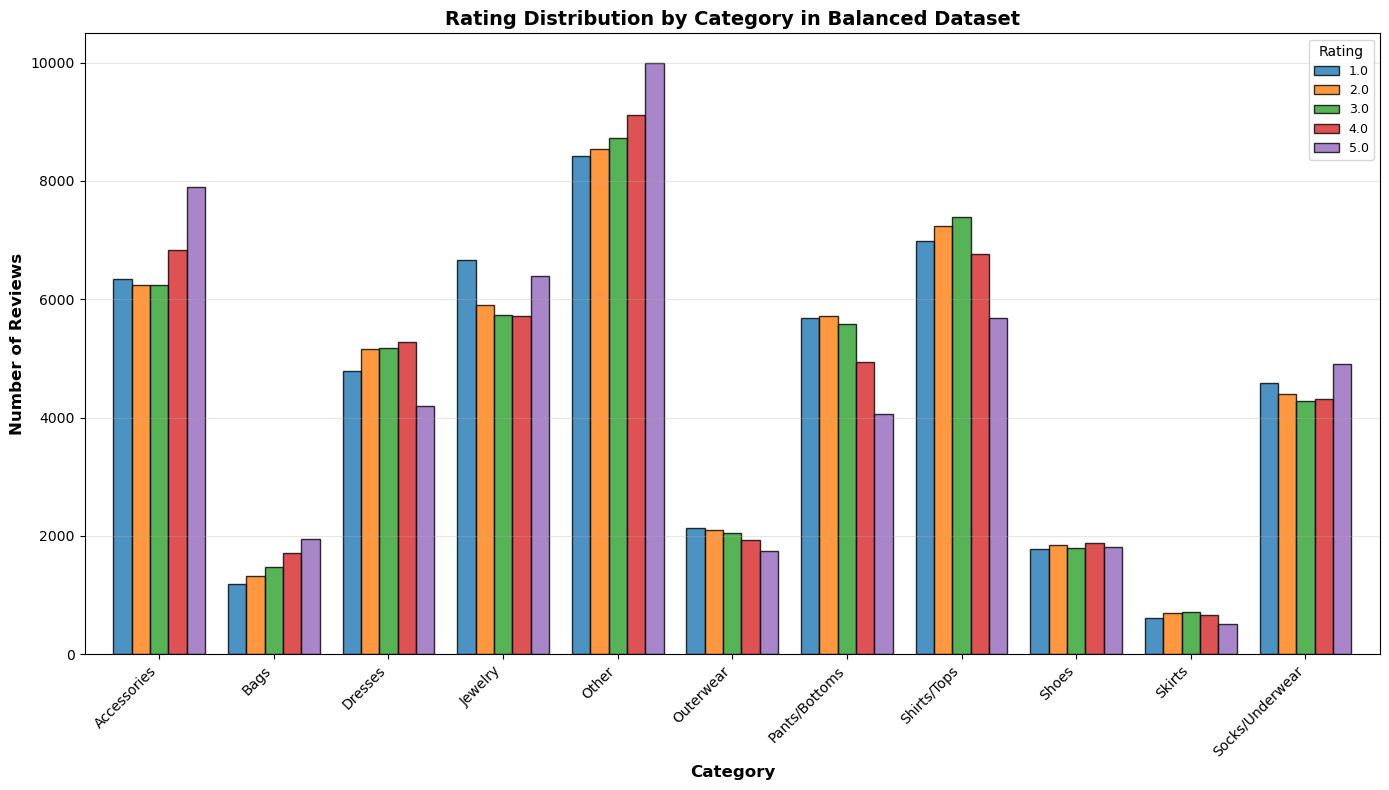

Rating distribution by category:
rating            1.0   2.0   3.0   4.0   5.0
category                                     
Accessories      6346  6247  6247  6841  7894
Bags             1185  1322  1474  1709  1947
Dresses          4783  5154  5170  5275  4201
Jewelry          6661  5908  5739  5715  6398
Other            8414  8533  8720  9116  9996
Outerwear        2126  2098  2042  1934  1745
Pants/Bottoms    5682  5719  5578  4945  4066
Shirts/Tops      6991  7244  7399  6769  5679
Shoes            1783  1846  1801  1887  1818
Skirts            613   688   711   656   514
Socks/Underwear  4577  4402  4280  4314  4903

Total reviews per category:
category
Accessories        33575
Bags                7637
Dresses            24583
Jewelry            30421
Other              44779
Outerwear           9945
Pants/Bottoms      25990
Shirts/Tops        34082
Shoes               9135
Skirts              3182
Socks/Underwear    22476
dtype: int64


In [27]:
# Bar chart of the distribution of ratings in the balanced dataset according to category
# Create a cross-tabulation of category and rating
category_rating_counts = pd.crosstab(balanced_df_equal['category'], balanced_df_equal['rating'])

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))
category_rating_counts.plot(kind='bar', ax=ax, width=0.8, edgecolor='black', alpha=0.8)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')
plt.title('Rating Distribution by Category in Balanced Dataset', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating', labels=['1.0', '2.0', '3.0', '4.0', '5.0'], title_fontsize=10, fontsize=9)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Rating distribution by category:")
print(category_rating_counts)
print(f"\nTotal reviews per category:")
print(category_rating_counts.sum(axis=1))

In [28]:
#export to csv
balanced_df_equal.to_csv('balanced_data.csv')